In [14]:
import pandas as pd

df = pd.read_csv('C:\\Users\Boss\Desktop\Diabetes.csv')

pd.set_option('display.max_rows', 140)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width',600)
print(df.head())

df=df.sample(n=50)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1


array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', 

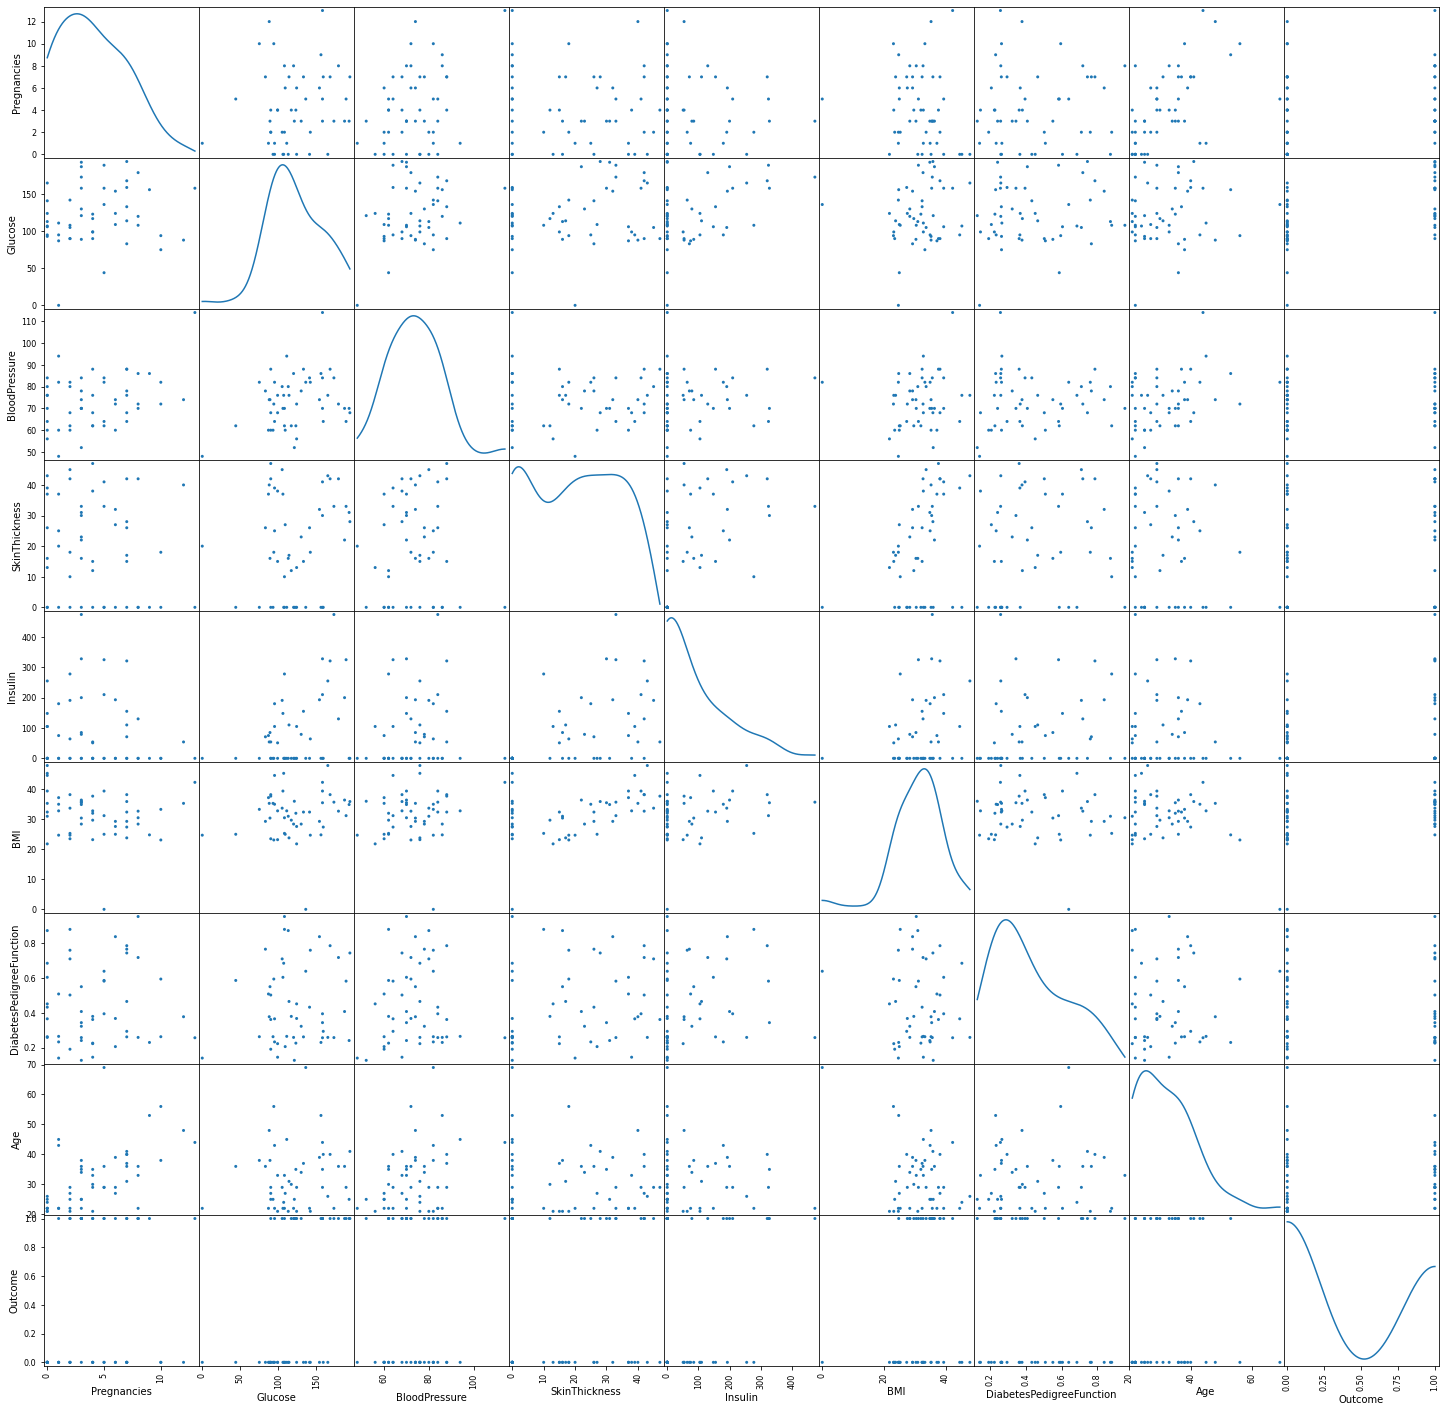

In [16]:
from pandas.plotting import scatter_matrix
df1=pd.DataFrame(df)
scatter_matrix(df1, alpha = 1, figsize = (25, 25), diagonal="kde")

In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.163232,0.361283,-0.157409,-0.143805,-0.164702,0.027376,0.587040,0.214766
Glucose,0.163232,1.000000,0.297941,0.179830,0.414565,0.172578,0.109245,0.136107,0.511256
BloodPressure,0.361283,0.297941,1.000000,0.020284,0.114249,0.156178,0.050609,0.352342,0.137347
SkinThickness,-0.157409,0.179830,0.020284,1.000000,0.507594,0.426666,0.154407,-0.184440,0.074871
Insulin,-0.143805,0.414565,0.114249,0.507594,1.000000,0.259913,0.175963,-0.132407,0.233892
BMI,-0.164702,0.172578,0.156178,0.426666,0.259913,1.000000,-0.099758,-0.349981,0.228418
DiabetesPedigreeFunction,0.027376,0.109245,0.050609,0.154407,0.175963,-0.099758,1.000000,0.063536,-0.057638
Age,0.587040,0.136107,0.352342,-0.184440,-0.132407,-0.349981,0.063536,1.000000,0.074344
Outcome,0.214766,0.511256,0.137347,0.074871,0.233892,0.228418,-0.057638,0.074344,1.000000


In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

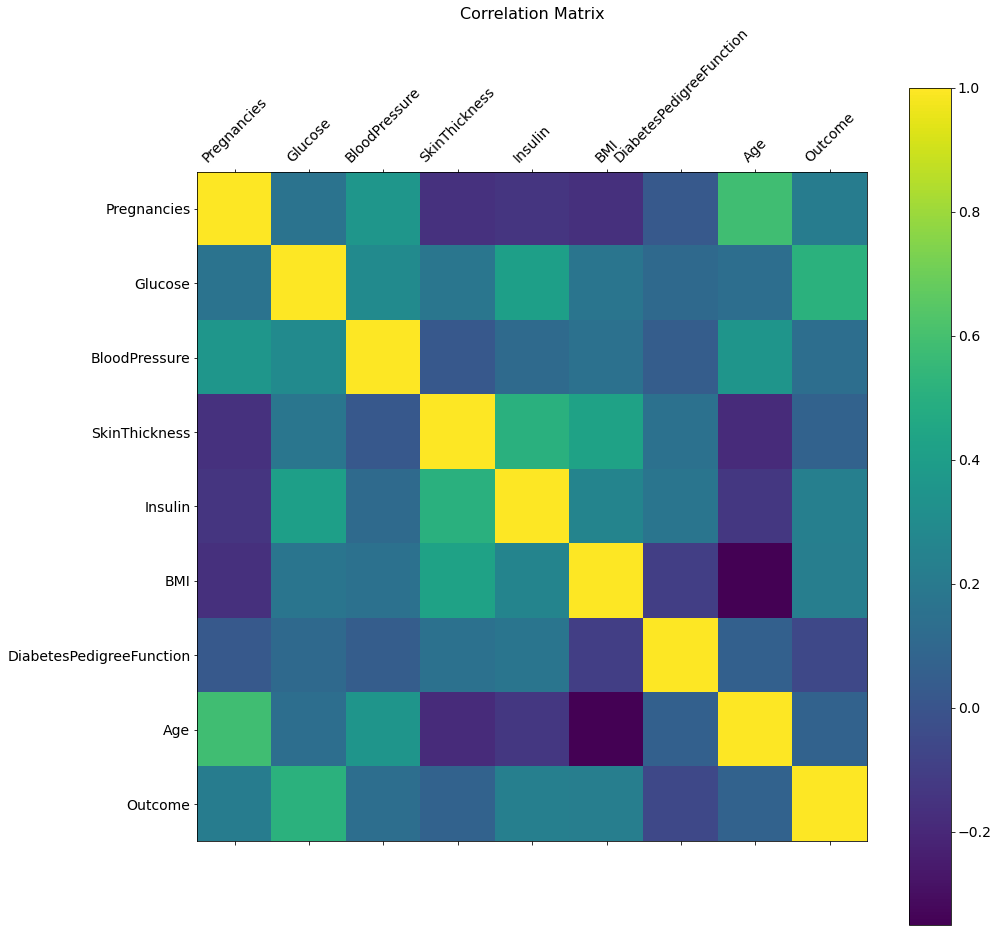

In [19]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [31]:
from scipy.stats import spearmanr
corr1, _ = spearmanr(df['Age'], df['Pregnancies'])
corr2, _ = spearmanr(df['Insulin'], df['SkinThickness'])
corr3, _ = spearmanr(df['BMI'], df['SkinThickness'])
print('Spearmans  correlation: %.3f' % corr1)
print('Spearmans  correlation: %.3f' % corr2)
print('Spearmans  correlation: %.3f' % corr3)


Spearmans  correlation: 0.638
Spearmans  correlation: 0.582
Spearmans  correlation: 0.466


In [35]:
from math import *
t1=corr1/sqrt(1/49)
print(t1)
t2=corr2/sqrt(1/49)
print(t2)
t3=corr3/sqrt(1/49)
print(t3)

4.1092784893053445
3.5531571090709124
2.9866633467438333


In [36]:
if(t1>2.576):
 print("H0 - corr=0 Is not correct => correlation coef is statistically valuable")
if(t2>2.576):
 print("H0 - corr=0 Is not correct => correlation coef is statistically valuable")
if(t3>2.576):
 print("H0 - corr=0 Is not correct => correlation coef is statistically valuable")

H0 - corr=0 Is not correct => correlation coef is statistically valuable
H0 - corr=0 Is not correct => correlation coef is statistically valuable
H0 - corr=0 Is not correct => correlation coef is statistically valuable


In [32]:
from scipy.stats import pearsonr
corr1, _ = pearsonr(df['Age'], df['Pregnancies'])
corr2, _ = pearsonr(df['Insulin'], df['SkinThickness'])
corr3, _ = pearsonr(df['BMI'], df['SkinThickness'])
print('Pearsons correlation: %.3f' % corr1)
print('Pearsons correlation: %.3f' % corr2)
print('Pearsons correlation: %.3f' % corr3)

Pearsons correlation: 0.587
Pearsons correlation: 0.508
Pearsons correlation: 0.427


In [33]:
from math import *
t1=corr1*sqrt(50-2)/sqrt(1-corr1**2)
print(t1)
t2=corr2*sqrt(50-2)/sqrt(1-corr2**2)
print(t2)
t3=corr3*sqrt(50-2)/sqrt(1-corr3**2)
print(t3)

5.023890204054748
4.081624833418218
3.268465387192139


In [34]:
if(t1>1.9842):
 print("H0 - corr=0 Is not correct => correlation coef is statistically valuable")
if(t2>1.9842):
 print("H0 - corr=0 Is not correct => correlation coef is statistically valuable")
if(t3>1.9842):
 print("H0 - corr=0 Is not correct => correlation coef is statistically valuable")


H0 - corr=0 Is not correct => correlation coef is statistically valuable
H0 - corr=0 Is not correct => correlation coef is statistically valuable
H0 - corr=0 Is not correct => correlation coef is statistically valuable


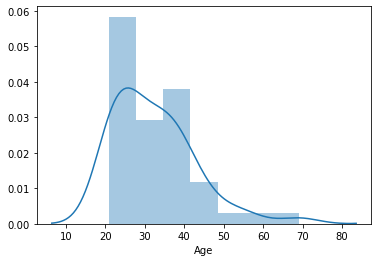

In [24]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.distplot(df['Age'])
plt.show()

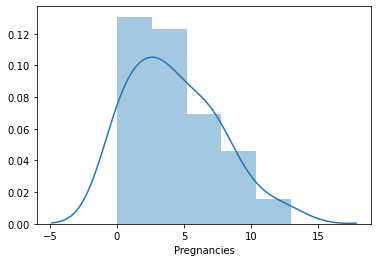

In [25]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.distplot(df['Pregnancies'])
plt.show()

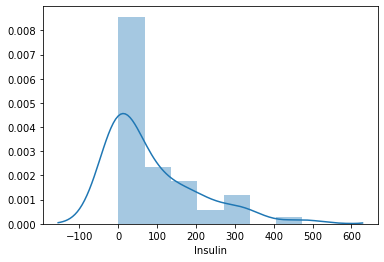

In [26]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.distplot(df['Insulin'])
plt.show()

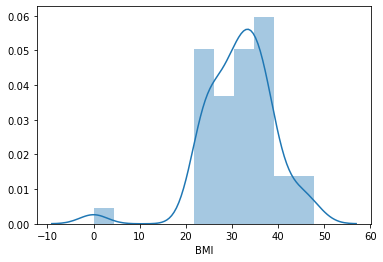

In [27]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.distplot(df['BMI'])
plt.show()

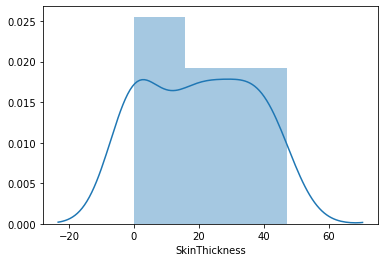

In [29]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.distplot(df['SkinThickness'])
plt.show()